3. Model selection and regularization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

3.1 Generalization and over fitting

In [2]:
X = np.array([ 0.  ,  0.16,  0.22,  0.34,  0.44,  0.5 ,  0.67,  0.73,  0.9 ,  1.  ])
Y = np.array([-0.06,  0.94,  0.97,  0.85,  0.25,  0.09, -0.9 , -0.93, -0.53,  0.08])

In [3]:
def show_graph(X, Y, x, y):
    # (X, Y) : data
    # (x, y) : regression line
    fig, ax = plt.subplots(dpi=100)
    ax.scatter(X, Y, marker='o', color='b')
    ax.plot(x, y, 'r')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.grid()
    fig.show()

In [9]:
def poly_reg(X, Y, d):
    # (X, Y) : data
    # d : degree of model
    W = np.polyfit(X, Y, d)
    print(f'W{d} : {W}')
    print(f'mean squared error : {np.mean((Y - np.polyval(W, X)) ** 2)}')

    x = np.linspace(0, 1, 1000)
    y = np.polyval(W, x)
    show_graph(X, Y, x, y)
     

W3 : [ 21.81795457 -32.58352732  10.97825774  -0.06314113]
mean squared error : 0.006168386150620846


<ipython-input-3-e339d47a564d>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


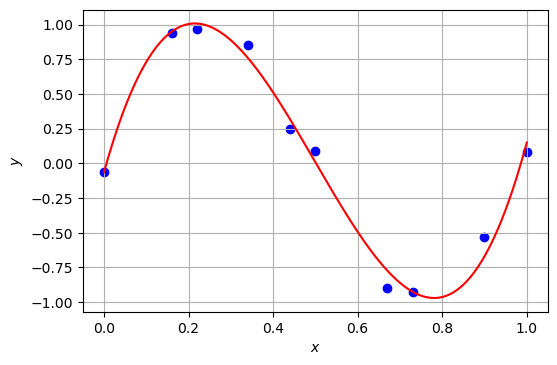

In [10]:
# degree = 3
poly_reg(X, Y, 3)

W9 : [ 7.92106359e+04 -3.56090735e+05  6.74161689e+05 -6.99307115e+05
  4.32757050e+05 -1.62771499e+05  3.61547202e+04 -4.33492219e+03
  2.20316075e+02 -5.99999999e-02]
mean squared error : 9.36579558307466e-21


<ipython-input-3-e339d47a564d>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


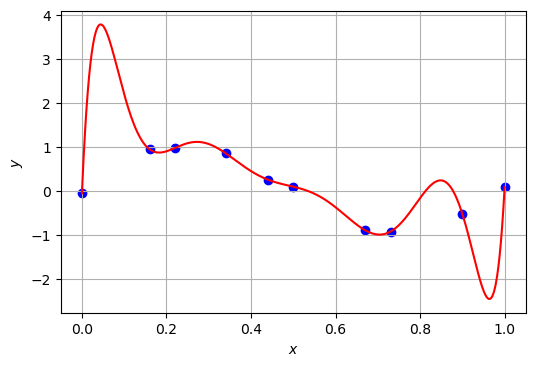

In [11]:
# degree = 9
poly_reg(X, Y, 9)

3.2 Model selection

In [12]:
X_valid = np.array([ 0.05,  0.08,  0.16,  0.28,  0.44,  0.47,  0.55,  0.63,  0.84,   0.99])
Y_valid = np.array([ 0.35,  0.58,  0.87,  0.98,  0.45,  0.01, -0.36, -0.73, -0.85,  -0.06])

In [14]:
# degree = 1 ~ 9
# calculate MSR for training set and validation set
for d in range(1, 10):
    W = np.polyfit(X, Y, d)
    Y_hat = np.polyval(W, X)
    Y_valid_hat = np.polyval(W, X_valid)
    MSR_train = np.mean((Y_hat - Y) ** 2)
    MSR_valid = np.mean((Y_valid_hat - Y_valid) ** 2)
    print(f'd = {d}: MSR = {MSR_train:.10f} (training), {MSR_valid:.10f} (validation)')

d = 1: MSR = 0.2911223347 (training), 0.1731786835 (validation)
d = 2: MSR = 0.2911017232 (training), 0.1724489756 (validation)
d = 3: MSR = 0.0061683862 (training), 0.0089782205 (validation)
d = 4: MSR = 0.0059072699 (training), 0.0086822313 (validation)
d = 5: MSR = 0.0027495672 (training), 0.0052849468 (validation)
d = 6: MSR = 0.0025021465 (training), 0.0060748073 (validation)
d = 7: MSR = 0.0024176615 (training), 0.0083442287 (validation)
d = 8: MSR = 0.0023835792 (training), 0.0061707210 (validation)
d = 9: MSR = 0.0000000000 (training), 1.9813186074 (validation)


<ipython-input-16-062780ab757a>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


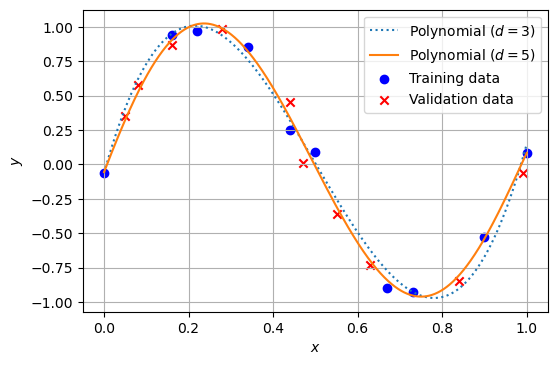

In [16]:
# show fitting graph of d = 3 and d = 5
fig, ax = plt.subplots(dpi=100)
ax.scatter(X, Y, marker='o', color='b', label='Training data')
ax.scatter(X_valid, Y_valid, marker='x', color='r', label='Validation data')

W3 = np.polyfit(X, Y, 3)
W5 = np.polyfit(X, Y, 5)
x = np.linspace(0, 1, 1000)
ax.plot(x, np.polyval(W3, x), label='Polynomial ($d=3$)', linestyle='dotted')
ax.plot(x, np.polyval(W5, x), label='Polynomial ($d=5$)', linestyle='solid')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend()
ax.grid()
fig.show()

3.3 L2 regularization

In [17]:
# show estimated parameters for each model
np.set_printoptions(precision=1, linewidth=180)
for d in range(1, 10):
    W = np.polyfit(X, Y, d)
    print(f'd = {d}: {W}')
np.set_printoptions()

d = 1: [-1.3  0.7]
d = 2: [ 0.1 -1.3  0.7]
d = 3: [ 21.8 -32.6  11.   -0.1]
d = 4: [ -2.7  27.1 -35.8  11.6  -0.1]
d = 5: [-4.1e+01  9.8e+01 -6.0e+01 -5.1e+00  8.0e+00 -5.6e-02]
d = 6: [-5.9e+01  1.4e+02 -1.2e+02  5.9e+01 -3.5e+01  1.1e+01 -5.9e-02]
d = 7: [ 2.5e+02 -9.4e+02  1.4e+03 -1.0e+03  3.9e+02 -9.5e+01  1.5e+01 -6.0e-02]
d = 8: [ 8.3e+02 -3.1e+03  4.5e+03 -3.4e+03  1.4e+03 -2.8e+02  2.4e+00  9.2e+00 -6.0e-02]
d = 9: [ 7.9e+04 -3.6e+05  6.7e+05 -7.0e+05  4.3e+05 -1.6e+05  3.6e+04 -4.3e+03  2.2e+02 -6.0e-02]


In [18]:
# show |w|_2^2 for each model
for d in range(1, 10):
    W = np.polyfit(X, Y, d)
    print(f'd = {d}: |w|_2^2 = {np.dot(W, W)}')

d = 1: |w|_2^2 = 2.1881924835400124
d = 2: |w|_2^2 = 2.338506288897597
d = 3: |w|_2^2 = 1658.2355242363515
d = 4: |w|_2^2 = 2162.738767715668
d = 5: |w|_2^2 = 15001.365517233775
d = 6: |w|_2^2 = 42524.332663708454
d = 7: |w|_2^2 = 3999189.9453020114
d = 8: |w|_2^2 = 44487211.246652305
d = 9: |w|_2^2 = 1291698589992.5498


3.4 Exercise
Ridge regression

In [19]:
X = np.array([ 0.  ,  0.16,  0.22,  0.34,  0.44,  0.5 ,  0.67,  0.73,  0.9 ,  1.  ])
Y = np.array([-0.06,  0.94,  0.97,  0.85,  0.25,  0.09, -0.9 , -0.93, -0.53,  0.08])
X_valid = np.array([ 0.05,  0.08,  0.12,  0.16,  0.28,  0.44,  0.47,  0.55,  0.63,  0.99])
Y_valid = np.array([ 0.35,  0.58,  0.68,  0.87,  0.83,  0.45,  0.01, -0.36, -0.83, -0.06])

<ipython-input-39-81f2405a95e7>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


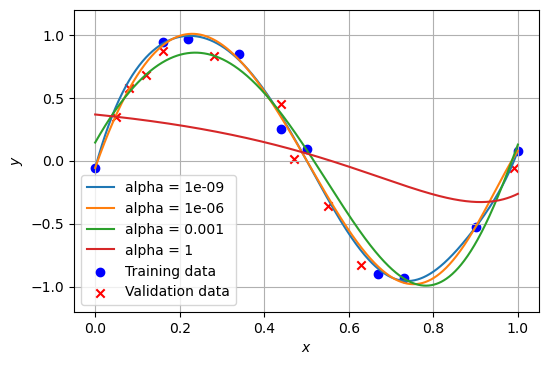

In [39]:
# Ridge regression
# alpha = 10^-9, 10^-6, 10^-3, 1

d = 9
fig, ax = plt.subplots(dpi=100)
ax.scatter(X, Y, marker='o', color='b', label='Training data')
ax.scatter(X_valid, Y_valid, marker='x', color='r', label='Validation data')

X_poly = np.zeros((len(X), d+1))
for i in range(len(X)):
    X_poly[i][0] = 1
    for j in range(1, d+1):
        X_poly[i][j] = X[i] ** j

x = np.linspace(0, 1, 1000)
for alpha in [10**(-9), 10**(-6), 10**(-3), 1]:
    W = np.dot(np.dot(np.linalg.inv(alpha * np.identity(d+1) + np.dot(X_poly.T, X_poly)), X_poly.T), Y)
    #W = np.dot(np.dot(np.linalg.inv(np.dot(X_poly.T, X_poly)), X_poly.T), Y)
    y_hat = np.zeros(len(x))
    for i in range(len(x)):
        tmp = 0
        for j in range(d+1):
            tmp += W[j] * x[i] ** j
        y_hat[i] = tmp
    ax.plot(x, y_hat, label=f'alpha = {alpha}')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_ylim(-1.2, 1.2)
plt.legend()
ax.grid()
fig.show()

In [35]:
# |w|_2^2 for each model
for alpha in [10**(-9), 10**(-6), 10**(-3), 1]:
    W = np.dot(np.dot(np.linalg.inv(alpha * np.identity(d+1) + np.dot(X_poly.T, X_poly)), X_poly.T), Y)
    print(f'alpha = {alpha}: |w|_2^2 = {np.dot(W, W)}')

alpha = 1e-09: |w|_2^2 = 210397.57855709677
alpha = 1e-06: |w|_2^2 = 714.5098347801141
alpha = 0.001: |w|_2^2 = 254.25787473627622
alpha = 1: |w|_2^2 = 0.5869639912371185


In [40]:
# MSR for validation set
for alpha in [10**(-9), 10**(-6), 10**(-3), 1]:
    W = np.dot(np.dot(np.linalg.inv(alpha * np.identity(d+1) + np.dot(X_poly.T, X_poly)), X_poly.T), Y)
    Y_valid_hat = np.zeros(len(X_valid))
    for i in range(len(X_valid)):
        tmp = 0
        for j in range(d+1):
            tmp += W[j] * X_valid[i] ** j
        Y_valid_hat[i] = tmp
    print(f'alpha = {alpha}: MSR (validation) = {np.mean((Y_valid - Y_valid_hat) ** 2)}')

alpha = 1e-09: MSR (validation) = 0.01050232184207953
alpha = 1e-06: MSR (validation) = 0.010066159820713485
alpha = 0.001: MSR (validation) = 0.01779045011170211
alpha = 1: MSR (validation) = 0.17280430903144867
